Weights: [0.35038739 0.93135323]
Bias: 0.9274800570257116
Cost: 1.3625535068858359


Weights: [0.34234851 0.92576575]
Bias: 0.9233463636754292
Cost: 1.3599811524913792


Weights: [0.33432192 0.9201861 ]
Bias: 0.9192138942426418
Cost: 1.3573908571983218


Weights: [0.3263077  0.91461435]
Bias: 0.9150827192211229
Cost: 1.3547825639209867


Weights: [0.31830597 0.90905053]
Bias: 0.9109529097306307
Cost: 1.3521562200450024


Weights: [0.31031681 0.9034947 ]
Bias: 0.9068245375075816
Cost: 1.3495117776343903


Weights: [0.30234033 0.89794691]
Bias: 0.9026976748950942
Cost: 1.3468491936420977


Weights: [0.29437663 0.89240721]
Bias: 0.8985723948323869
Cost: 1.344168430123731


Weights: [0.28642582 0.88687565]
Bias: 0.8944487708435163
Cost: 1.3414694544542187


Weights: [0.27848799 0.88135229]
Bias: 0.8903268770254427
Cost: 1.3387522395471063


Weights: [0.27056326 0.87583718]
Bias: 0.8862067880354113
Cost: 1.3360167640761662


Weights: [0.26265171 0.87033037]
Bias: 0.8820885790776345
Cost: 1.

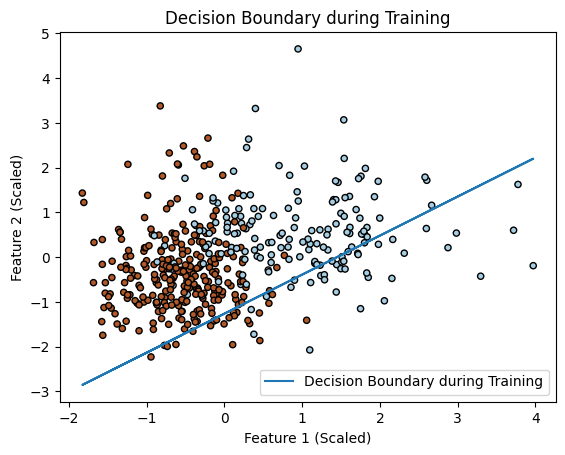

Accuracy: 0.61
Precision: 0.40
Recall: 0.61
F1-Score: 0.48

Insights:
The model achieved an accuracy of 0.61 on the testing set.
The precision is 0.40, recall is 0.61, and F1-score is 0.48.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent_slp(x, y, learning_rate=0.01, iterations=100):
    w = np.random.rand(x.shape[1])
    b = np.random.rand()
    n = len(x)

    for i in range(iterations):
        z = np.dot(x, w) + b
        y_predicted = sigmoid(z)

        dw = -(1/n) * np.dot(x.T, (y - y_predicted))
        db = -(1/n) * np.sum(y - y_predicted)

        w = w - learning_rate * dw
        b = b - learning_rate * db

        cost = np.mean((y - y_predicted) ** 2)

        print("Weights:", w)
        print("Bias:", b)
        print("Cost:", cost)
        print("\n")

    return w, b

def predict(x, w, b):
    z = np.dot(x, w) + b
    return sigmoid(z)

def plot_decision_boundary(x, y, w, b, title):
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k', s=20)
    decision_boundary = -(b + w[0] * x[:, 0]) / w[1]
    plt.plot(x[:, 0], decision_boundary, label=title)
    plt.legend()
    plt.title(title)
    plt.xlabel('Feature 1 (Scaled)')
    plt.ylabel('Feature 2 (Scaled)')
    plt.show()


cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = 2 * cancer.target - 1


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

w, b = gradient_descent_slp(X_train, y_train)


plot_decision_boundary(X_train, y_train, w, b, title='Decision Boundary during Training')

y_pred = np.round(predict(X_test, w, b))


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

print("\nInsights:")
print(f"The model achieved an accuracy of {accuracy:.2f} on the testing set.")
print(f"The precision is {precision:.2f}, recall is {recall:.2f}, and F1-score is {f1:.2f}.")
